In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import scipy.io.wavfile
from scipy.io.wavfile import write
import IPython

In [2]:
all_data= scipy.io.wavfile.read("./tone.wav")

In [3]:
sample_count = len(all_data[1])

44100


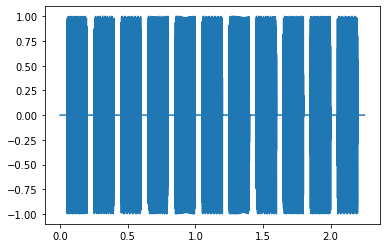

In [104]:
sample_rate = all_data[0]
# T = 0.06116 s
signal =all_data[1][:sample_count]
t=np.arange(0,10 ,step=1/sample_rate)
plt.plot(t[:sample_count],signal)
print(sample_rate)

In [105]:
fourier= np.fft.fft(signal)



In [106]:
fourier = np.fft.fft(signal)
n = signal.size
timestep = 1/sample_rate
freq = np.fft.fftfreq(n, d=timestep)
freq


array([ 0.        ,  0.44444444,  0.88888889, ..., -1.33333333,
       -0.88888889, -0.44444444])

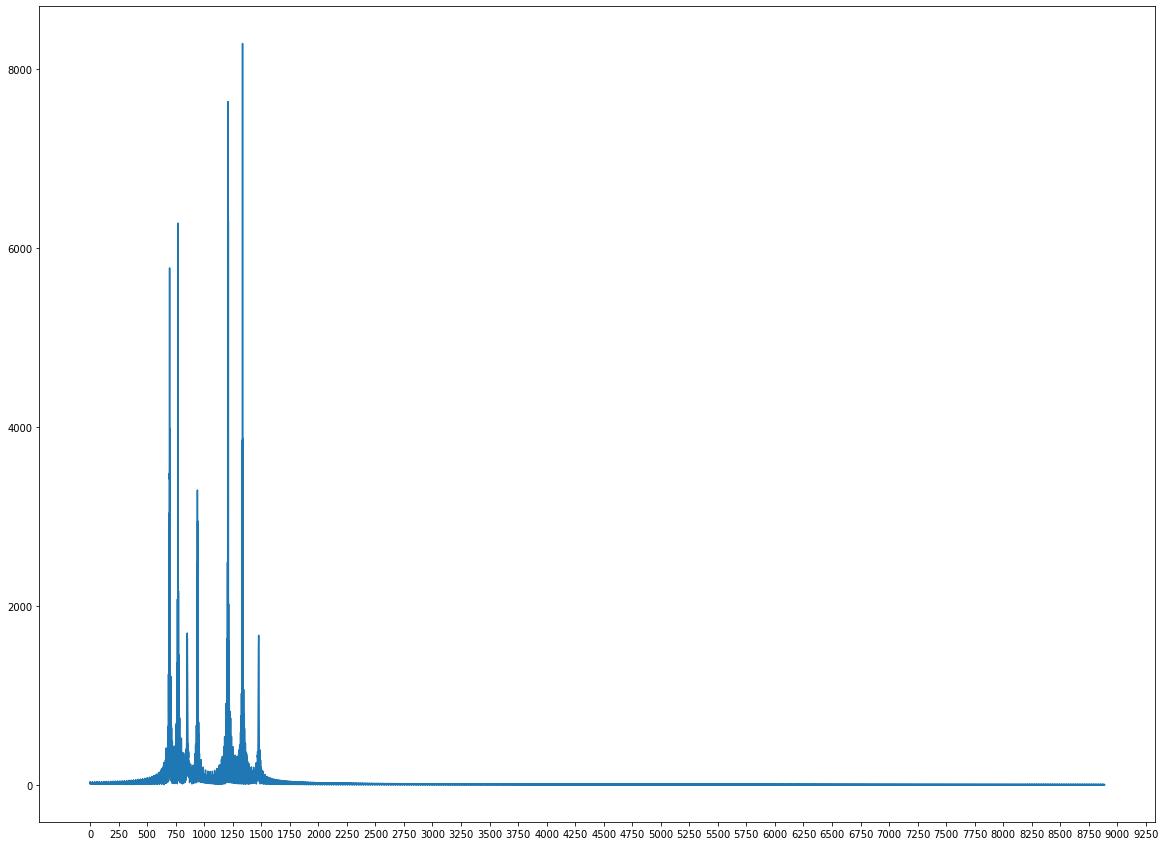

In [80]:
count =20000
plt.figure(figsize=(20,15))
plt.xticks(range(0,10000,250))
plt.plot(freq[:count],abs(fourier[:count]))

In [119]:
def cal_fourier(signal , timestep = 1/sample_rate):
    fourier = np.fft.fft(signal)
    n = signal.size
    freq = np.fft.fftfreq(n, d=timestep)
    x=np.arange(0,2000 ,step=1)
#     print(len(freq) , len(fourier))
#     print(abs(fourier))
#     print(np.interp(x, freq ,abs(fourier)))
    
    

    return x,np.interp(x, freq[1:n//2] ,abs(fourier)[1:n//2])
#     return freq[1:n//2] ,abs(fourier)[1:n//2]


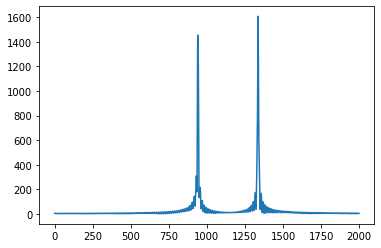

In [120]:
plt.plot(*cal_fourier(signal[:10000]))
# len(cal_fourier(signal)[1])
x,y = cal_fourier(signal[:1000])
# for i in range(len(x)):
#     print(x[i],y[i])
    

In [131]:


def split_padded(a,n):
    splitedSize = n
    return  [a[x:x+splitedSize] for x in range(0, len(a), splitedSize)]

def split_and_calculate(signal ,window_size):
    
    sub_signals = split_padded(signal,window_size)
    results = []
    for i,s in enumerate(sub_signals):
        freq ,abs_fourier= cal_fourier(s)
        results+= [(i , freq ,abs_fourier)]*10
        
    return results


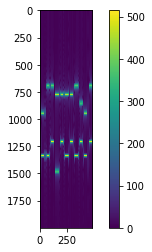

In [142]:
items =split_and_calculate(signal ,2048)
new_items =[i[2] for i in items][:-10]
new_items
# for x in new_items:
#     print(len(x))
X=np.stack(new_items, axis=0)

plt.imshow(X.T, interpolation='none')
plt.colorbar()



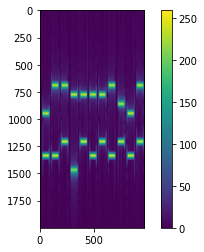

In [143]:
items =split_and_calculate(signal ,1024)
new_items =[i[2] for i in items][:-10]
new_items
# for x in new_items:
#     print(len(x))
X=np.stack(new_items, axis=0)

plt.imshow(X.T)
plt.colorbar()



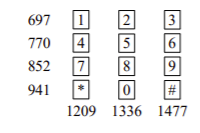

همانطور که فرکانس شماره ها و طیف فرکانس بر زمان را میبینیم شماره گرفته شده

# 02164542701

است که شماره ای آشنا هست


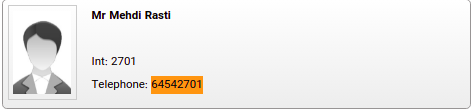

In [130]:
# from scipy import signal
# sample_rate, samples = scipy.io.wavfile.read('./tone.wav')
# frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

# plt.pcolormesh(times, frequencies, spectrogram)
# plt.imshow(spectrogram)
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# spectrogram